<a href="https://colab.research.google.com/github/ShellyMatoki/Predicting-house-prices-ML/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

טעינה של הנתונים


In [ ]:
import pandas as pd
df = pd.read_csv('Givat_Shmual.csv', encoding='iso-8859-8')
df.head()

,גוש חלקה,יום מכירה,"תמורה מוצהרת בש""ח","שווי מכירה בש""ח",מהות,חלק נמכר,ישוב,שנת בניה,שטח,חדרים
0,006369-0337-041-00,19/12/2023,1993144,1993144,דירה בבית קומות,0.5,גבעת שמואל,2023,139,5.0
1,006369-0335-061-00,13/12/2023,3896288,3896288,דירה בבית קומות,1.0,גבעת שמואל,2022,145,6.0
2,006185-0225-011-00,26/11/2023,2650000,2650000,דירה בבית קומות,1.0,גבעת שמואל,1970,130,5.0
3,006191-0082-002-00,10/12/2023,4730000,4730000,דירה בבית קומות,1.0,גבעת שמואל,2025,133,5.0
4,006392-0214-061-00,06/12/2023,2800000,2800000,דירה בבית קומות,1.0,גבעת שמואל,2013,110,4.0


דיאגרמות של הנתונים

הסקות מהדיאגרמות :
1.שנת בניה -כל הערכים שמופיעים בשנת בנייה 0 הם ערכים חסרים שיש להסיר אותם
2.מספר החדרים-מספר חדרים כמו 30 ו 50 הם נתונים לא אמינים ולכן הסרנו אותם (נראה כמו שגיאת הקלדה)
3.הסרת שטח של בית שהוא מעל 500 (נראה כמו חריגים)

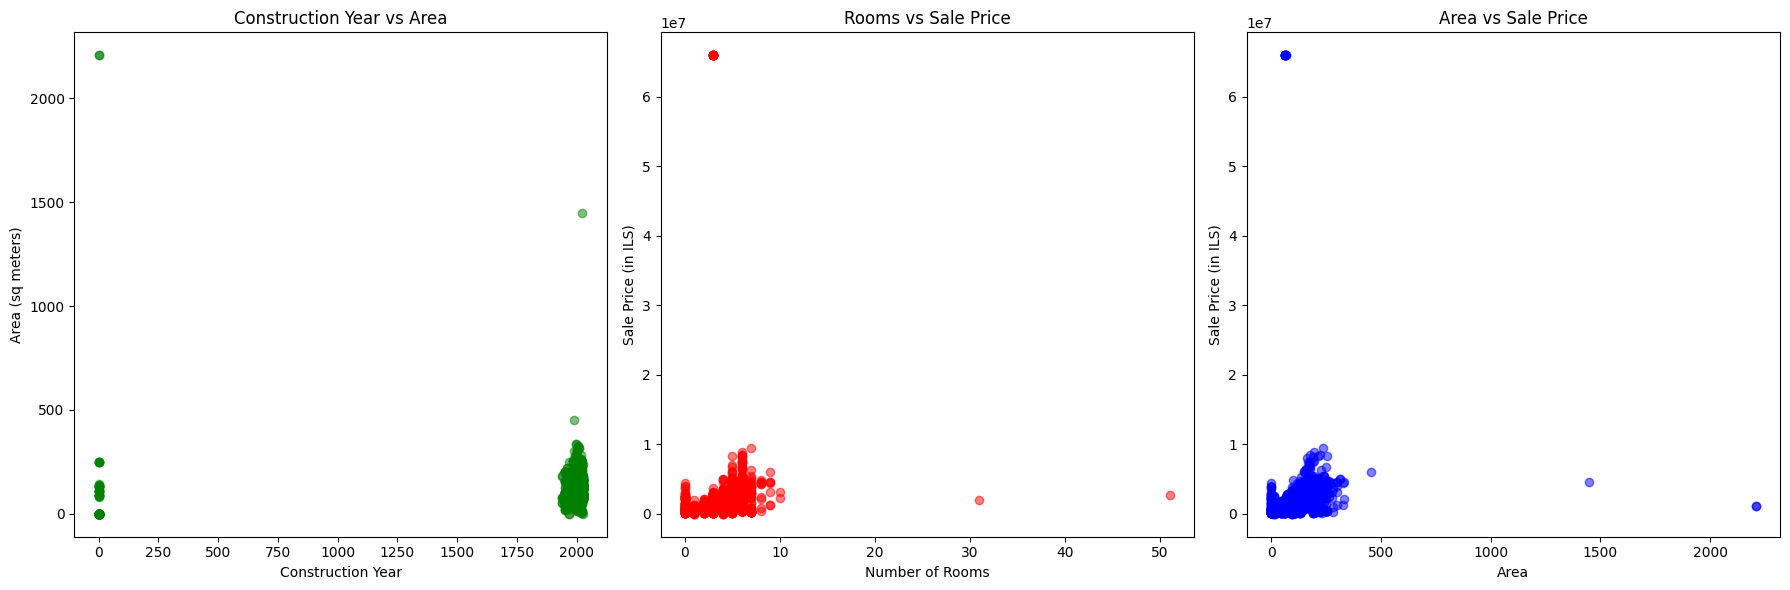

In [ ]:
import matplotlib.pyplot as plt

# Convert column names to English for easier reference in the code
df.columns = ['Block', 'Sale_Date', 'Declared_Value', 'Sale_price', 'Type', 'Fraction_Sold', 'City', 'Construction_Year', 'Area', 'Rooms']

fig, axs = plt.subplots(1, 3, figsize=(18, 6))


# Rooms vs Sale Price
axs[1].scatter(df['Rooms'], df['Sale_price'], alpha=0.5, color='red')
axs[1].set_title('Rooms vs Sale Price')
axs[1].set_xlabel('Number of Rooms')
axs[1].set_ylabel('Sale Price (in ILS)')

# Construction Year vs Area
axs[0].scatter(df['Construction_Year'], df['Area'], alpha=0.5, color='green')
axs[0].set_title('Construction Year vs Area')
axs[0].set_xlabel('Construction Year')
axs[0].set_ylabel('Area (sq meters)')

# Area vs Sale Price
axs[2].scatter(df['Area'], df['Sale_price'], alpha=0.5, color='blue')
axs[2].set_title('Area vs Sale Price')
axs[2].set_xlabel('Area')
axs[2].set_ylabel('Sale Price (in ILS)')


plt.tight_layout()

plt.show()

היסטוגרמות זהות


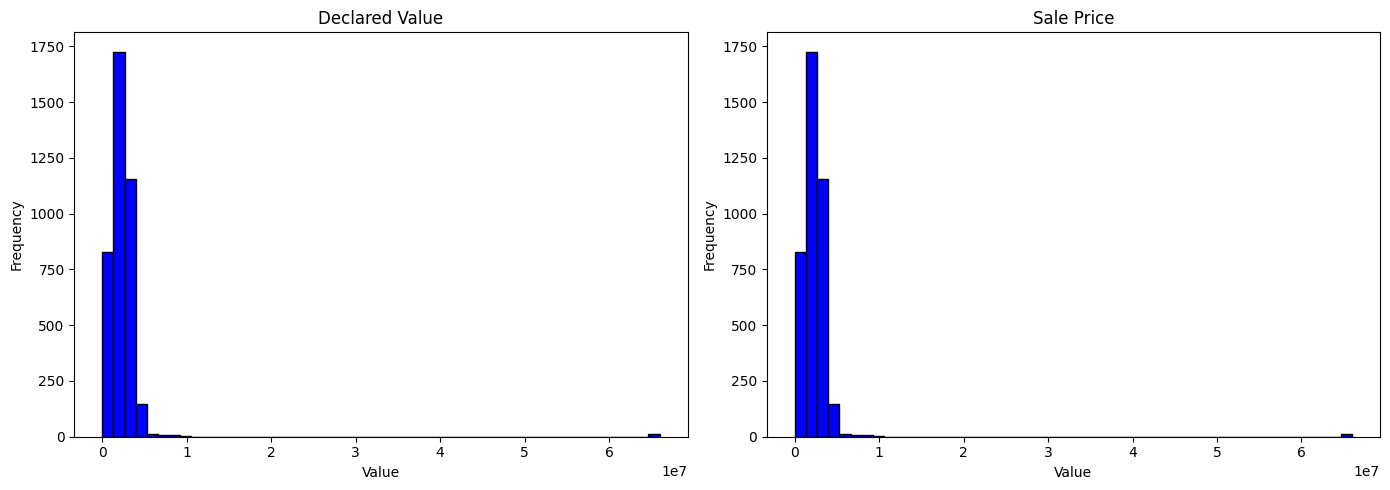

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(14,5))

# Histogram for Declared Value
plt.subplot(1, 2, 1)
plt.hist(df['Declared_Value'], bins=50, color='blue', edgecolor='black')
plt.title('Declared Value')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Histogram for Sale Price
plt.subplot(1, 2, 2)
plt.hist(df['Sale_price'], bins=50, color='blue', edgecolor='black')
plt.title('Sale Price')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


ניתן לראות כי יש ערכים שיגויים ככל הנראה
דירה רגילה לא מכילה 30 או 50 חדרים
בנוסף לא קיים שנת בנייה 0 וזה מצביע על ערכים חסרים
כמו בן נמחק גם שטחים מעל 1000

In [ ]:
df = df[df['Rooms'] <= 20]
df = df[df['Area'] <= 500]
df = df[df['Construction_Year']>1850]

בדיקה האם קיימים ערכים חסרים נוספים

In [ ]:
import numpy as np
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_columns)
Categorical_columns=df.select_dtypes(include=['object']).columns
print(Categorical_columns)
for col in numeric_columns:
    count_nan = df[col].isna().sum()
    count_zero = (df[col] == 0).sum()
    print(f"{col}: NaNs: {count_nan}, Zeros: {count_zero}")

for col in Categorical_columns:
    count_nan = df[col].isna().sum()
    count_zero = (df[col] == 0).sum()
    print(f"{col}: NaNs: {count_nan}, Zeros: {count_zero}")


df = df[df['Fraction_Sold'] != 0]

['Declared_Value', 'Sale_price', 'Fraction_Sold', 'Construction_Year', 'Area', 'Rooms']
Index(['Block', 'Sale_Date', 'Type', 'City'], dtype='object')
Declared_Value: NaNs: 0, Zeros: 0
Sale_price: NaNs: 0, Zeros: 0
Fraction_Sold: NaNs: 0, Zeros: 3
Construction_Year: NaNs: 0, Zeros: 0
Area: NaNs: 0, Zeros: 0
Rooms: NaNs: 0, Zeros: 0
Block: NaNs: 0, Zeros: 0
Sale_Date: NaNs: 0, Zeros: 0
Type: NaNs: 0, Zeros: 0
City: NaNs: 0, Zeros: 0


מחיקת עמודה של יישוב מכיוון שכל העמודה מכילה את אותו ערך

In [ ]:
del df['City']

מחיקה של עמודת
Declared_Value
לאחר שנבדק שיוויון לעמודת
Sale_price

In [ ]:
col1 = 'Declared_Value'
col2 = 'Sale_price'

# Check if the two columns have the same values
same_values = (df[col1] == df[col2]).all()

if same_values:
    print(f"The values in {col1} and {col2} are the same.")
else:
    print(f"The values in {col1} and {col2} are different.")

The values in Declared_Value and Sale_price are the same.


In [ ]:
del df['Declared_Value']

 מבדיקה של הנתונים עלה כי בחלקי דירה שנמכרו מופיע בשטח ובמספר החדרים החלק המלא (זאת אומרת שיש לעדכן את מספר החדרים וגם את השטח לחלק שנמכר)
  

In [ ]:

filtered_rows = df['Fraction_Sold'] < 1

# Update 'area' and 'rooms' for these rows
df.loc[filtered_rows, 'Area'] = df['Area'] * df['Fraction_Sold']
df.loc[filtered_rows, 'Rooms'] = df['Rooms'] * df['Fraction_Sold']


df.loc[filtered_rows, 'Rooms'] = df['Rooms'].round()


labeling and one hot vector

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df['Block'])

df['Block'] = le.transform(df['Block'])



In [ ]:
df = pd.concat([df, pd.get_dummies(df['Type'], prefix=col)], axis=1)

# Drop the original string columns
df.drop('Type', axis=1, inplace=True)

BOXPLOT

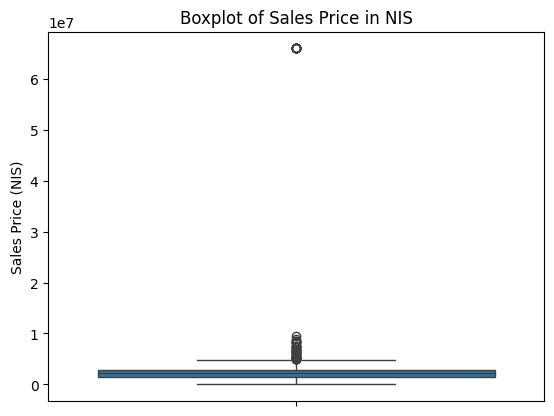

Number of observations after outlier removal: 3735


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sales_column = df["Sale_price"]

sns.boxplot(data=sales_column)

plt.title('Boxplot of Sales Price in NIS')
plt.ylabel('Sales Price (NIS)')


plt.show()

Q1 = df["Sale_price"].quantile(0.25)
Q3 = df["Sale_price"].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower limits for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df["Sale_price"] >= lower_limit) & (df["Sale_price"] <= upper_limit)]


print(f"Number of observations after outlier removal: {len(df)}")

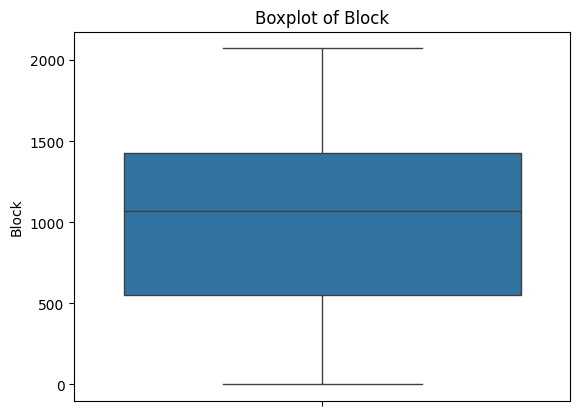

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sales_column = df["Block"]

sns.boxplot(data=sales_column)


plt.title('Boxplot of Block')
plt.ylabel('Block')


plt.show()

Q1 = df["Block"].quantile(0.25)
Q3 = df["Block"].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower limits for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

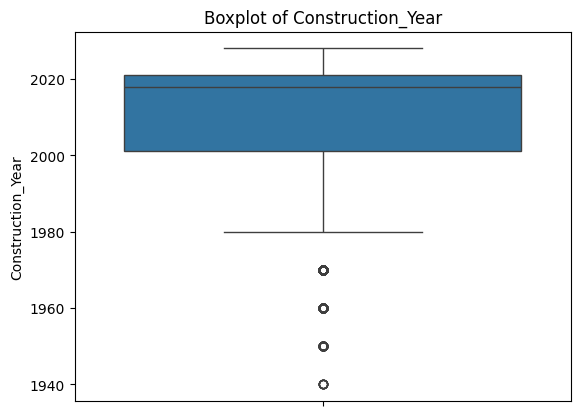

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sales_column = df["Construction_Year"]

sns.boxplot(data=sales_column)

plt.title('Boxplot of Construction_Year')
plt.ylabel('Construction_Year')

plt.show()

Q1 = df["Construction_Year"].quantile(0.25)
Q3 = df["Construction_Year"].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower limits for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [ ]:
df = df[df['Construction_Year']>1960]

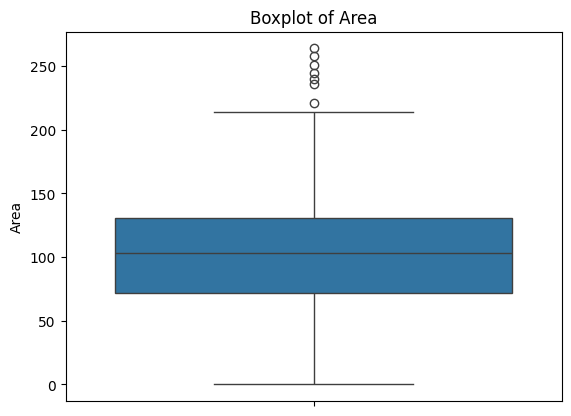

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sales_column = df["Area"]

sns.boxplot(data=sales_column)

plt.title('Boxplot of Area')
plt.ylabel('Area')

plt.show()

Q1 = df["Area"].quantile(0.25)
Q3 = df["Area"].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [ ]:
df = df[df['Area']<220]

Correlation Table

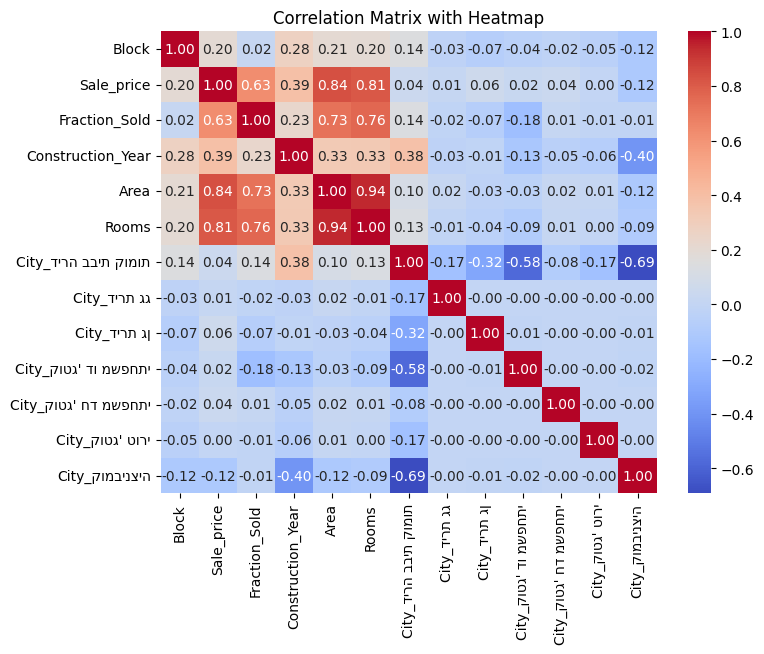

In [ ]:
import seaborn as sns

df = df.drop(columns=['Sale_Date'])
# Calculate the correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Heatmap')
plt.show()

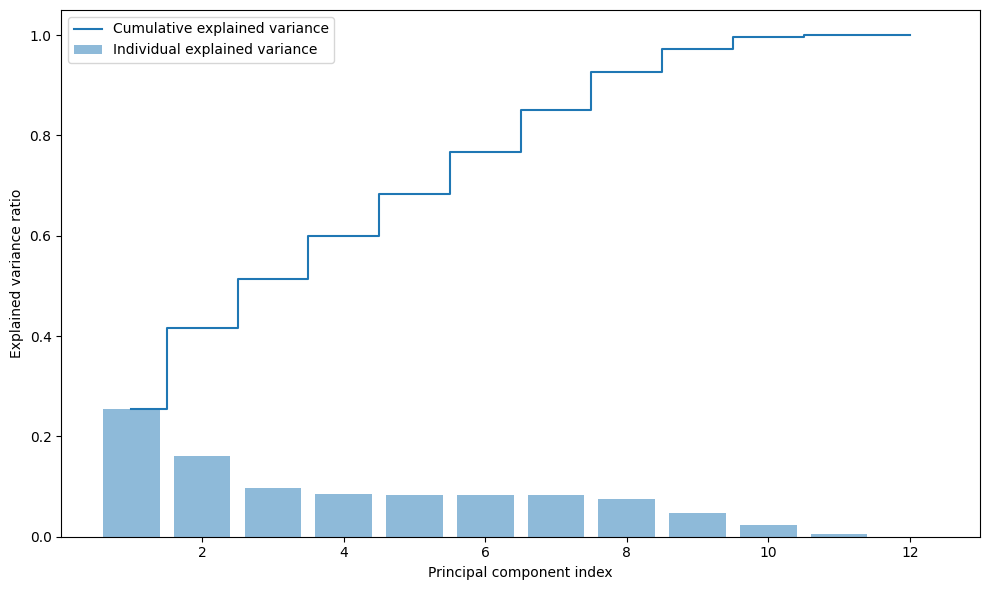

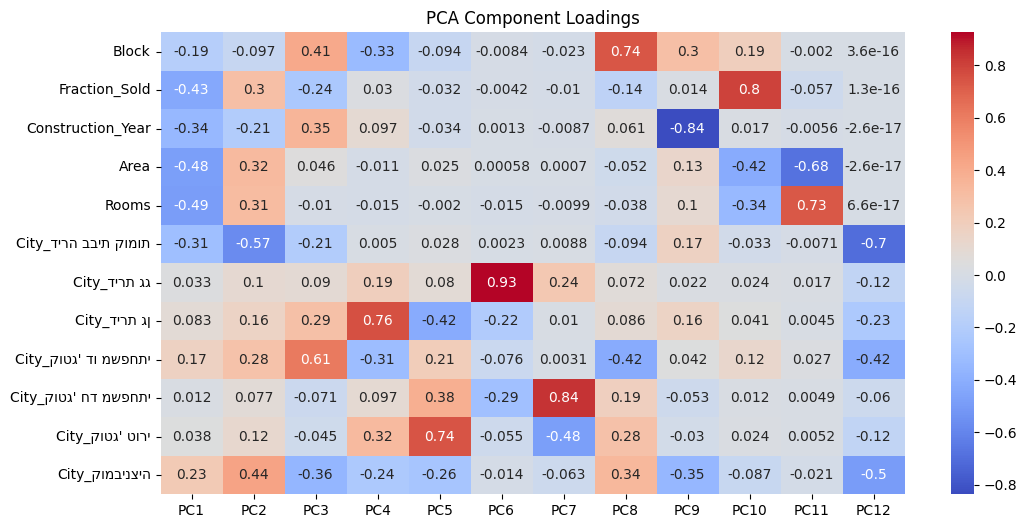

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_data = df.drop(columns=['Sale_price'])


scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)


pca = PCA()
pca_data_transformed = pca.fit_transform(pca_data_scaled)


loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, index=pca_data.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])



explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)


plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(df_loadings, annot=True, cmap='coolwarm')
plt.title('PCA Component Loadings')
plt.show()

אלגוריתם ראשון :
KNN

Best k value based on CV: 2
Best average CV MAE: 228812.50671938976


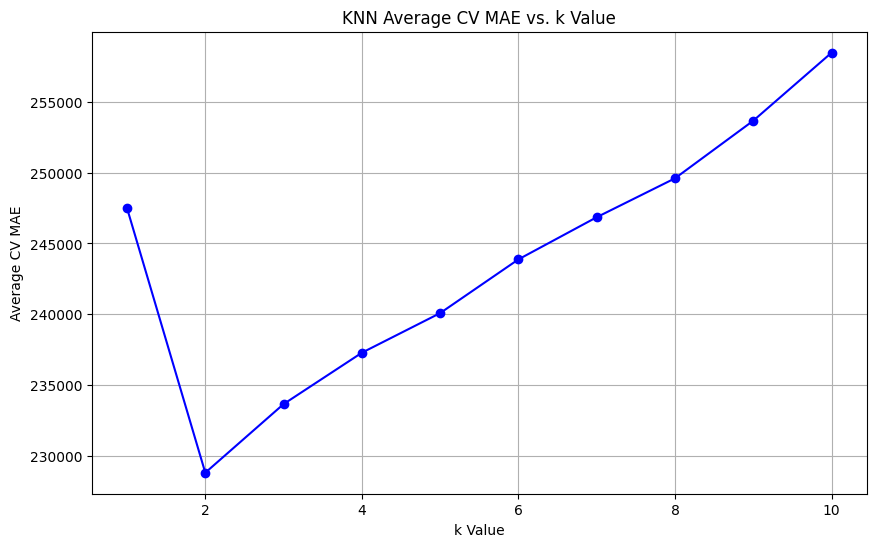

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


X_columns = [ 'Block','Construction_Year', 'Area']
y_column = 'Sale_price'

X, y = df[X_columns], df[y_column]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the StandardScaler
scaler = StandardScaler()

# Scaling the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mae_results_knn = {}

k_values = np.arange(1, 11)  # k values from 1 to 10

# Finding the best k using cross-validation
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae_cv = -cv_scores.mean()
    mae_results_knn[k] = mae_cv

best_k = min(mae_results_knn, key=mae_results_knn.get)
best_mae_cv = mae_results_knn[best_k]

print(f"Best k value based on CV: {best_k}")
print(f"Best average CV MAE: {best_mae_cv}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(list(mae_results_knn.keys()), list(mae_results_knn.values()), marker='o', linestyle='-', color='b')
plt.title('KNN Average CV MAE vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Average CV MAE')
plt.grid(True)
plt.show()





בדיקה של התאמת יתר עבור K=2 מכיוון שזה מספר נמוך אז המודל יותר רגיש
במקרה זה ניקח את K=6 כי הוא הכי מתאים

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error


for k in range(1,10):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Predict on the training and test sets
    y_pred_train = knn.predict(X_train_scaled)
    y_pred_test = knn.predict(X_test_scaled)

    # Calculate the performance metrics on the training set
    train_r2 = r2_score(y_train, y_pred_train)
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_medae = median_absolute_error(y_train, y_pred_train)

    # Calculate the performance metrics on the test set
    test_r2 = r2_score(y_test, y_pred_test)
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_medae = median_absolute_error(y_test, y_pred_test)

    # Print the performance metrics
    print(f"k={k}:")
    print(f"  Train R-squared (R^2): {train_r2}")
    print(f"  Train Mean Squared Error (MSE): {train_mse}")
    print(f"  Train Mean Absolute Error (MAE): {train_mae}")
    print(f"  Train Median Absolute Error (MedAE): {train_medae}")
    print(f"  Test R-squared (R^2): {test_r2}")
    print(f"  Test Mean Squared Error (MSE): {test_mse}")
    print(f"  Test Mean Absolute Error (MAE): {test_mae}")
    print(f"  Test Median Absolute Error (MedAE): {test_medae}")
    print("\n")

k=1:
  Train R-squared (R^2): 0.9799881838583946
  Train Mean Squared Error (MSE): 19169165714.841103
  Train Mean Absolute Error (MAE): 35913.18502824859
  Train Median Absolute Error (MedAE): 0.0
  Test R-squared (R^2): 0.7953396085994636
  Test Mean Squared Error (MSE): 197445135086.0339
  Test Mean Absolute Error (MAE): 229094.60169491524
  Test Median Absolute Error (MedAE): 77053.0


k=2:
  Train R-squared (R^2): 0.9326634477517206
  Train Mean Squared Error (MSE): 64501168688.51916
  Train Mean Absolute Error (MAE): 127867.73605225989
  Train Median Absolute Error (MedAE): 48225.0
  Test R-squared (R^2): 0.8560500574593547
  Test Mean Squared Error (MSE): 138875019519.2387
  Test Mean Absolute Error (MAE): 207625.42372881356
  Test Median Absolute Error (MedAE): 94017.0


k=3:
  Train R-squared (R^2): 0.9146252622438297
  Train Mean Squared Error (MSE): 81779808705.44995
  Train Mean Absolute Error (MAE): 153145.59439736346
  Train Median Absolute Error (MedAE): 68124.8333333333

ניתן להסיק כי K=6
מציג איזון טוב בין נתוני האימון למבחן וגם מבחינת התוצאות


k=6:
  Train R-squared (R^2): 0.8801790395934406
  Train Mean Squared Error (MSE): 114775582080.70193
  Train Mean Absolute Error (MAE): 193199.57115112993
  Train Median Absolute Error (MedAE): 98583.33333333326
  Test R-squared (R^2): 0.8653025419580008
  Test Mean Squared Error (MSE): 129948729291.73047
  Test Mean Absolute Error (MAE): 214135.71233521655
  Test Median Absolute Error (MedAE): 115380.25

RANDOM FOREST

Best number of estimators based on CV: 49
Best average CV MAE: 235388.43548342033


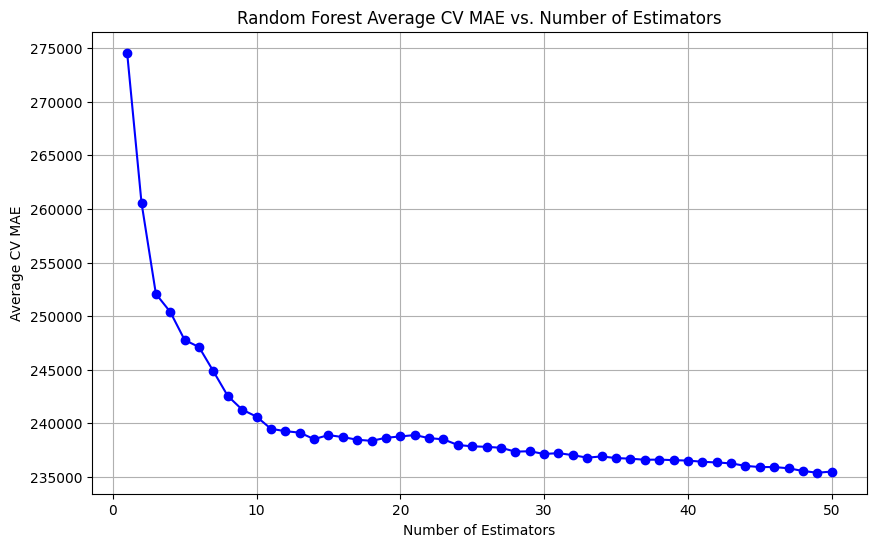

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



X_columns = ['Block', 'Construction_Year', 'Area']

y_column = 'Sale_price'

X, y = df[X_columns], df[y_column]

test_size = 0.2


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=42)


mae_results_rf = {}

n_values = np.arange(1, 51)


for n_estimators in n_values:

    rf = RandomForestRegressor(n_estimators=n_estimators,criterion='absolute_error',max_depth=7,min_samples_split=2,  random_state=42) #max_depth=10,

    cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

    mae_cv = -cv_scores.mean()
    mae_results_rf[n_estimators] = mae_cv

best_n_estimators = min(mae_results_rf, key=mae_results_rf.get)
best_mae_cv = mae_results_rf[best_n_estimators]


print(f"Best number of estimators based on CV: {best_n_estimators}")
print(f"Best average CV MAE: {best_mae_cv}")


plt.figure(figsize=(10, 6))
plt.plot(list(mae_results_rf.keys()), list(mae_results_rf.values()), marker='o', linestyle='-', color='b')
plt.title('Random Forest Average CV MAE vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Average CV MAE')
plt.grid(True)
plt.show()

Best max_features (CV): 2
Best average CV MAE: 233904.22641025748
Train Mean Absolute Error (MAE): 200183.4109196645
Train Mean Squared Error (MSE): 120618105355.59009
Train Median Absolute Error (MedAE): 107130.78571428562
Train R-squared (R2): 0.8740796869497524
Test Mean Absolute Error (MAE): 213227.53947595987
Test Mean Squared Error (MSE): 119520430048.78995
Test Median Absolute Error (MedAE): 117843.64285714272
Test R-squared (R2): 0.8761119235301128


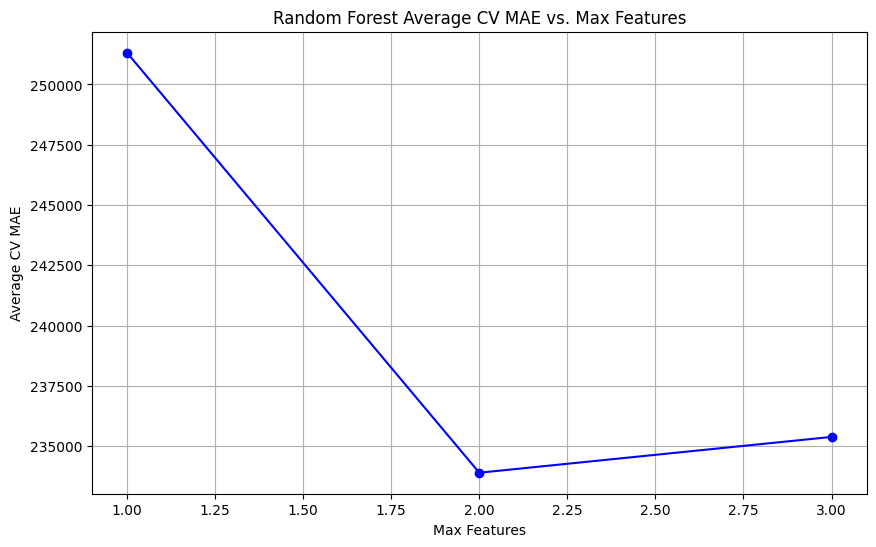

In [ ]:
X_columns = ['Block', 'Construction_Year', 'Area']

y_column = 'Sale_price'


X, y = df[X_columns], df[y_column]
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

mae_results_rf_cv = {}

n_estimators_fixed = 49  # Optimal number of estimators
max_values = np.arange(1, 4)
n_splits = 5

for max_features in max_values:
    rf = RandomForestRegressor(n_estimators=n_estimators_fixed,
                               max_features=max_features,
                               criterion='absolute_error',
                               max_depth=7,
                               min_samples_split=2,
                               random_state=42)
    cv_scores = cross_val_score(rf, X_train, y_train, cv=n_splits, scoring='neg_mean_absolute_error')
    mae_cv = -cv_scores.mean()
    mae_results_rf_cv[max_features] = mae_cv

best_max_features_cv = min(mae_results_rf_cv, key=mae_results_rf_cv.get)
best_mae_cv = mae_results_rf_cv[best_max_features_cv]

print(f"Best max_features (CV): {best_max_features_cv}")
print(f"Best average CV MAE: {best_mae_cv}")

rf_best = RandomForestRegressor(n_estimators=n_estimators_fixed,
                                max_features=best_max_features_cv,
                                criterion='absolute_error',
                                max_depth=7,
                                min_samples_split=2,
                                random_state=42)

rf_best.fit(X_train, y_train)

y_pred_test = rf_best.predict(X_test)

test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_medae = median_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

y_pred_train = rf_best.predict(X_train)

# Calculate metrics for the training data
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_medae = median_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

# Print the performance metrics for the training set
print(f"Train Mean Absolute Error (MAE): {train_mae}")
print(f"Train Mean Squared Error (MSE): {train_mse}")
print(f"Train Median Absolute Error (MedAE): {train_medae}")
print(f"Train R-squared (R2): {train_r2}")


print(f"Test Mean Absolute Error (MAE): {test_mae}")
print(f"Test Mean Squared Error (MSE): {test_mse}")
print(f"Test Median Absolute Error (MedAE): {test_medae}")
print(f"Test R-squared (R2): {test_r2}")

plt.figure(figsize=(10, 6))
plt.plot(list(mae_results_rf_cv.keys()), list(mae_results_rf_cv.values()), marker='o', linestyle='-', color='b')
plt.title('Random Forest Average CV MAE vs. Max Features')
plt.xlabel('Max Features')
plt.ylabel('Average CV MAE')
plt.grid(True)
plt.show()

Best number of estimators based on CV MAE: 30
Best average CV MAE: 260058.67573791635


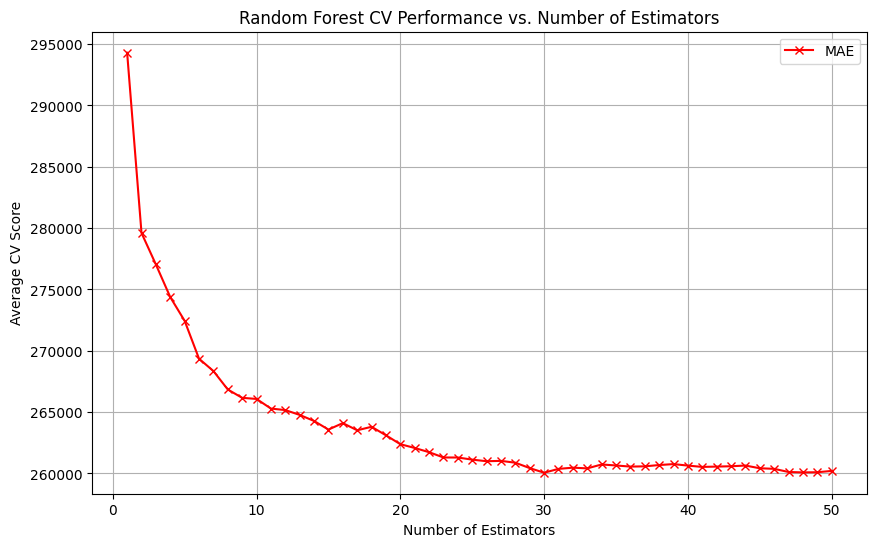

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



test_size = 0.2

X_columns = ['Block', 'Construction_Year', 'Area']
y_column = 'Sale_price'

X, y = df[X_columns], df[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,  random_state=42)

mae_results_rf = {}

n_values = np.arange(1, 51)


n_folds = 5

for n_estimators in n_values:
    rf = RandomForestRegressor(n_estimators=n_estimators, criterion='squared_error',  max_depth=6,min_samples_split=10,random_state=42)

    mae_cv_scores = cross_val_score(rf, X_train, y_train, cv=n_folds, scoring='neg_mean_absolute_error', error_score='raise')

    mae_cv = -mae_cv_scores.mean()

    mae_results_rf[n_estimators] = mae_cv


best_n_estimators_mae = min(mae_results_rf, key=mae_results_rf.get)
best_mae_cv = mae_results_rf[best_n_estimators_mae]

print(f"Best number of estimators based on CV MAE: {best_n_estimators_mae}")
print(f"Best average CV MAE: {best_mae_cv}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(list(mae_results_rf.keys()), list(mae_results_rf.values()), marker='x', linestyle='-', color='r', label='MAE')
plt.title('Random Forest CV Performance vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Average CV Score')
plt.legend()
plt.grid(True)
plt.show()


Best max_features (CV): 2
Best average CV MAE: 258601.27459737024
Train Mean Absolute Error (MAE): 234779.69380567767
Train Mean Squared Error (MSE): 130405149839.60324
Train Median Absolute Error (MedAE): 159065.15675553877
Train R-squared (R2): 0.8638624173148955
Test Mean Absolute Error (MAE): 239967.20643293543
Test Mean Squared Error (MSE): 131053494084.12076
Test Median Absolute Error (MedAE): 159536.87007880502
Test R-squared (R2): 0.8641574056409292


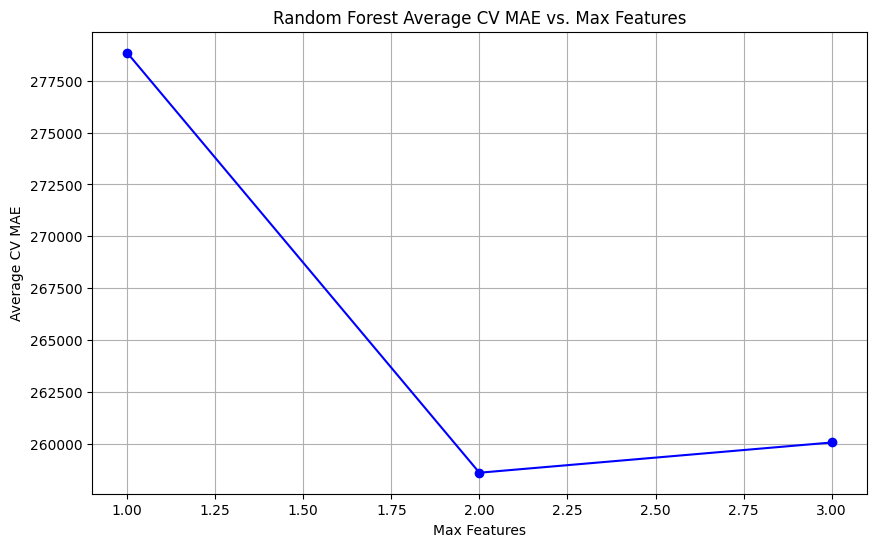

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, make_scorer,mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



test_size = 0.2

X_columns = ['Block', 'Construction_Year', 'Area']
y_column = 'Sale_price'


X, y = df[X_columns], df[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,   random_state=42)

mae_results_rf_cv = {}

n_estimators_fixed = 30
max_values = np.arange(1,4)
n_splits = 5

for max_features in max_values:

    rf = RandomForestRegressor(n_estimators=n_estimators_fixed, max_features=max_features,criterion='squared_error',max_depth=6,min_samples_split=10, random_state=42)
    cv_scores = cross_val_score(rf, X_train, y_train, cv=n_splits, scoring='neg_mean_absolute_error')

    mae_cv = -cv_scores.mean()
    mae_results_rf_cv[max_features] = mae_cv


best_max_features_cv = min(mae_results_rf_cv, key=mae_results_rf_cv.get)
best_mae_cv = mae_results_rf_cv[best_max_features_cv]

print(f"Best max_features (CV): {best_max_features_cv}")
print(f"Best average CV MAE: {best_mae_cv}")


rf_best = RandomForestRegressor(n_estimators=n_estimators_fixed,
                                max_features=best_max_features_cv,
                                criterion='squared_error',
                                max_depth=6,
                                min_samples_split=10,
                                random_state=42)


rf_best.fit(X_train, y_train)


y_pred_train = rf_best.predict(X_train)


train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_medae = median_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)


print(f"Train Mean Absolute Error (MAE): {train_mae}")
print(f"Train Mean Squared Error (MSE): {train_mse}")
print(f"Train Median Absolute Error (MedAE): {train_medae}")
print(f"Train R-squared (R2): {train_r2}")


y_pred_test = rf_best.predict(X_test)

test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_medae = median_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)


print(f"Test Mean Absolute Error (MAE): {test_mae}")
print(f"Test Mean Squared Error (MSE): {test_mse}")
print(f"Test Median Absolute Error (MedAE): {test_medae}")
print(f"Test R-squared (R2): {test_r2}")

plt.figure(figsize=(10, 6))
plt.plot(list(mae_results_rf_cv.keys()), list(mae_results_rf_cv.values()), marker='o', linestyle='-', color='b')
plt.title('Random Forest Average CV MAE vs. Max Features')
plt.xlabel('Max Features')
plt.ylabel('Average CV MAE')
plt.grid(True)
plt.show()

**PCA** TO RANDOM FOREST

In [ ]:

pca = PCA(n_components=6)
pca_data_transformed = pca.fit_transform(pca_data_scaled)  # Use fit_transform here

# Creating a DataFrame for the PCA results
pca_columns = [f'PC{i+1}' for i in range(6)]
pca_df = pd.DataFrame(pca_data_transformed, columns=pca_columns)
print(pca_df.head())




        PC1       PC2       PC3       PC4       PC5       PC6
0  0.710813 -1.370900  0.918424 -0.327832 -0.103725  0.011933
1 -2.052277  0.496383  0.513098 -0.319022 -0.110987 -0.029963
2  0.181022  1.206547 -1.937972  0.323795  0.278110 -0.000897
3 -1.431571  0.300996  0.024705  0.156418  0.002688 -0.009584
4 -0.946159 -0.078546  0.497748 -0.528998 -0.158999 -0.017680


Best number of estimators based on CV MAE: 44
Best average CV MAE: 230298.91376391513


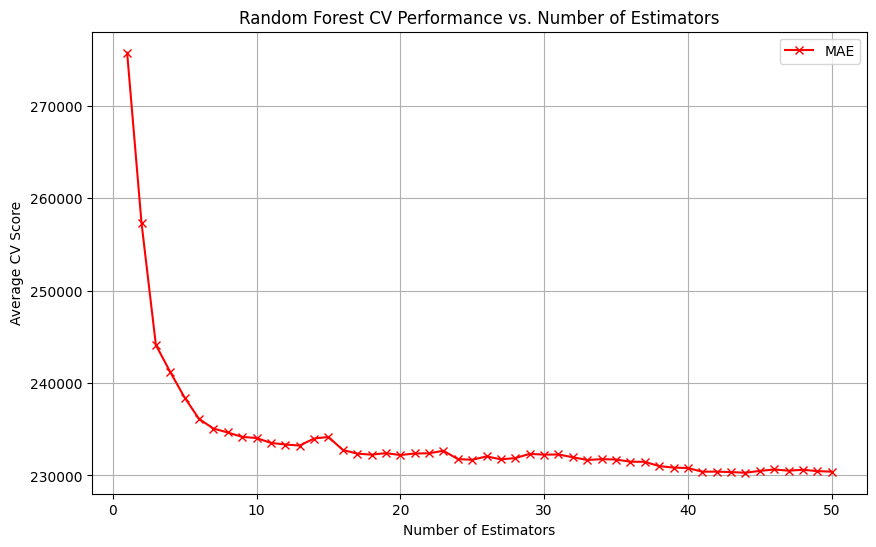

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



X = pca_df
y = df["Sale_price"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mae_results_rf = {}

n_values = np.arange(1, 51)

n_folds = 5


for n_estimators in n_values:

    rf = RandomForestRegressor(n_estimators=n_estimators, criterion='absolute_error',max_depth=12, min_samples_split=18,random_state=42)

    mae_cv_scores = cross_val_score(rf, X_train, y_train, cv=n_folds, scoring='neg_mean_absolute_error', error_score='raise')

    mae_cv = -mae_cv_scores.mean()

    mae_results_rf[n_estimators] = mae_cv


best_n_estimators_mae = min(mae_results_rf, key=mae_results_rf.get)
best_mae_cv = mae_results_rf[best_n_estimators_mae]

print(f"Best number of estimators based on CV MAE: {best_n_estimators_mae}")
print(f"Best average CV MAE: {best_mae_cv}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(list(mae_results_rf.keys()), list(mae_results_rf.values()), marker='x', linestyle='-', color='r', label='MAE')
plt.title('Random Forest CV Performance vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Average CV Score')
plt.legend()
plt.grid(True)
plt.show()

Best max_features (CV): 4
Best average CV MAE: 227997.8065404947
Train Mean Absolute Error (MAE): 167096.35980434643
Train Mean Squared Error (MSE): 89921603970.4773
Train Median Absolute Error (MedAE): 84220.76704545459
Train R-squared (R2): 0.9061255647436837
Test Mean Absolute Error (MAE): 202509.49921353362
Test Mean Squared Error (MSE): 107745742996.14467
Test Median Absolute Error (MedAE): 113272.19886363647
Test R-squared (R2): 0.8883168940894692


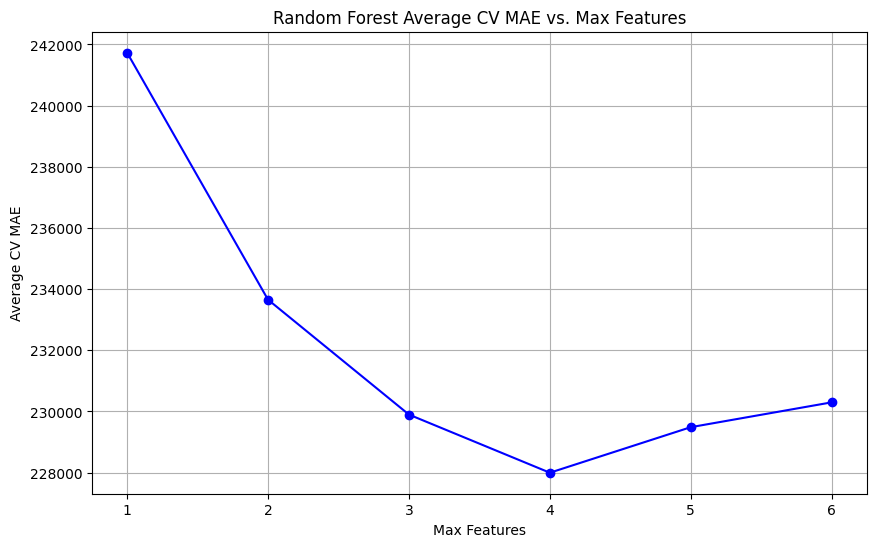

In [ ]:

X = pca_df
y = df["Sale_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mae_results_rf_cv = {}

n_estimators_fixed = 44
max_values = np.arange(1,7)
n_splits = 5


for max_features in max_values:
    rf = RandomForestRegressor(n_estimators=n_estimators_fixed, max_features=max_features,criterion='absolute_error', max_depth=12, min_samples_split=18,random_state=42)
    cv_scores = cross_val_score(rf, X_train, y_train, cv=n_splits, scoring='neg_mean_absolute_error')

    mae_cv = -cv_scores.mean()
    mae_results_rf_cv[max_features] = mae_cv

best_max_features_cv = min(mae_results_rf_cv, key=mae_results_rf_cv.get)
best_mae_cv = mae_results_rf_cv[best_max_features_cv]

print(f"Best max_features (CV): {best_max_features_cv}")
print(f"Best average CV MAE: {best_mae_cv}")


rf_best = RandomForestRegressor(n_estimators=n_estimators_fixed,
                                max_features=best_max_features_cv,
                                criterion='absolute_error',
                                max_depth=12,
                                min_samples_split=18,
                                random_state=42)


rf_best.fit(X_train, y_train)

y_pred_train = rf_best.predict(X_train)


train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_medae = median_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)


print(f"Train Mean Absolute Error (MAE): {train_mae}")
print(f"Train Mean Squared Error (MSE): {train_mse}")
print(f"Train Median Absolute Error (MedAE): {train_medae}")
print(f"Train R-squared (R2): {train_r2}")


y_pred_test = rf_best.predict(X_test)


test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_medae = median_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)


print(f"Test Mean Absolute Error (MAE): {test_mae}")
print(f"Test Mean Squared Error (MSE): {test_mse}")
print(f"Test Median Absolute Error (MedAE): {test_medae}")
print(f"Test R-squared (R2): {test_r2}")


plt.figure(figsize=(10, 6))
plt.plot(list(mae_results_rf_cv.keys()), list(mae_results_rf_cv.values()), marker='o', linestyle='-', color='b')
plt.title('Random Forest Average CV MAE vs. Max Features')
plt.xlabel('Max Features')
plt.ylabel('Average CV MAE')
plt.grid(True)
plt.show()